In [684]:
import numpy as np
import matplotlib.pyplot as plt

with open('tasks/14.txt', 'r') as f:
    data = f.read().split('\n')

In [685]:
cave_h, cave_w = 250, 800
cave = np.zeros((cave_h, cave_w), np.int8)

max_y = 0
for block in data:
    lines = block.split('->')
    start_x, start_y = [int(x) for x in lines[0].split(',')]
    for i in range(len(lines)-1):
        x, y = [int(x) for x in lines[i+1].split(',')]
        if y > max_y:
            max_y = y
        cave[min(start_y, y):max(start_y, y)+1, min(start_x, x):max(start_x,x)+1] = 1
        start_x, start_y = x, y

max_y += 2
cave[max_y] = 1
start_sand_x, start_sand_y = 500, 0

In [686]:
def find_rest_point(y, x):
    new_y = np.argmax(cave[y:cave_h, x])
    if new_y:
        y += new_y
        if not cave[y, x-1]: # and cave[y, x+1]:
            return find_rest_point(y, x-1)
        elif not cave[y, x+1]:
            return find_rest_point(y, x+1)
        return y - 1, x
    return False

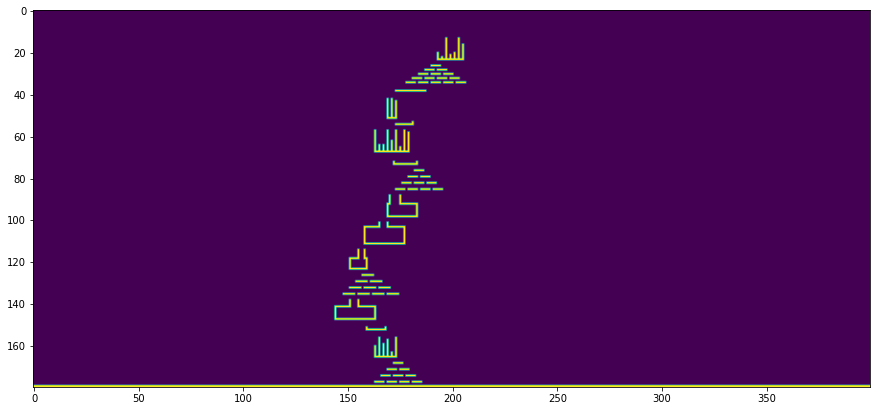

In [681]:
plt.figure(figsize=(15,15))
plt.imshow(cave[:max_y+1, 300:700])

In [682]:
first_part_finished = False
sand = 0
while True:
    new_point = find_rest_point(start_sand_y, start_sand_x)
    if new_point:
        if not first_part_finished and (new_point[0] == max_y-1):
            print(f'first_part: {sand}')
            first_part_finished = True
        cave[new_point] = 1
        sand+=1
        continue
    break
print(f'second_part: {sand}')

first_part: 795
second_part: 30214
